# Exploratory Plots With Pandas

## Load packages and sample data

Most visualizations in this notebook require only the Pandas library. We import seaborn just for the sample dataset.

In [69]:
pip install pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset("mpg") 

In [71]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Create a new column to get some more categorical data

In [72]:
def get_brand_from_name(name_str):
  return(name_str.split(" ")[0])

In [73]:
df['brand'] = df['name'].apply(get_brand_from_name)

In [74]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


## Distributions

### Categorical data

Absolute Frequency plot

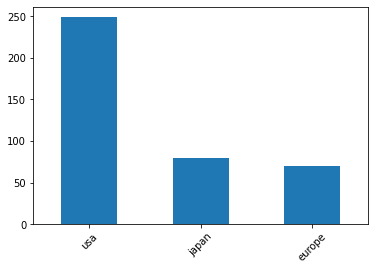

In [75]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html
df['origin'].value_counts().plot.bar(rot = 45)

Relative frequency plot

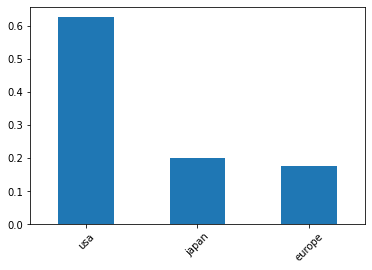

In [76]:
df['origin'].value_counts(normalize = True).plot.bar(rot = 45)

(horizontal version)

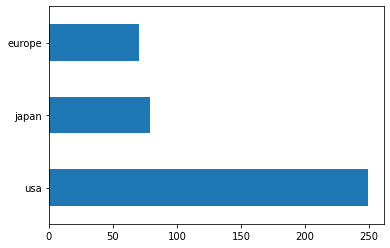

In [77]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
df['origin'].value_counts().plot.barh()

Multidimensional frequency table
(simple heatmap)

In [78]:
pd.pivot_table(df, index = ["origin", "brand"], values = ["name"], aggfunc = "nunique").style.background_gradient(cmap='Blues')

### Numeric

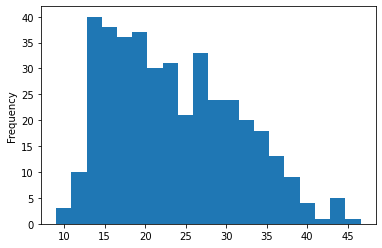

In [79]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
df['mpg'].plot.hist(bins = 20)

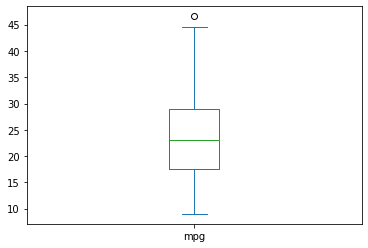

In [80]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html
df['mpg'].plot.box()

## Comparisons

### Single numeric variable by category

Barchart

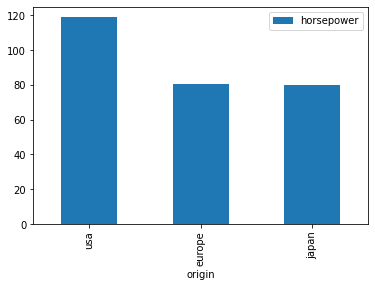

In [81]:
(pd
 .pivot_table(data = df, index = ["origin"], values = ['horsepower'], aggfunc = 'mean' )
 .sort_values("horsepower", ascending = False)
 .plot
 .bar())

Boxplots

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


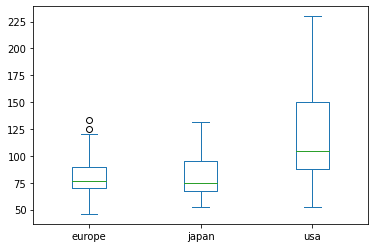

In [82]:
pivot = pd.pivot_table(df, index = df.index, values = 'horsepower', columns = "origin")
pivot.plot.box();

Horizontal Barchart 

For lots of categories / categories with long names

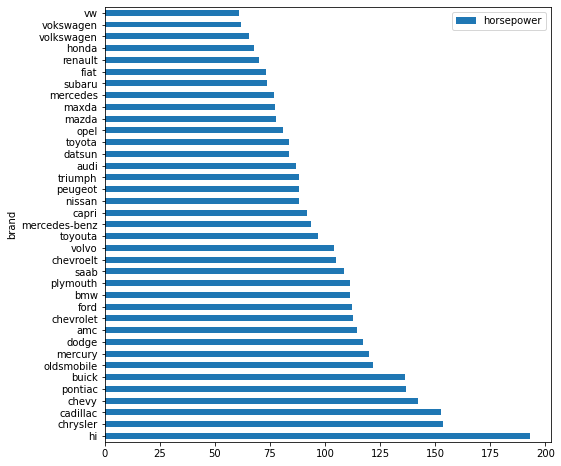

In [83]:
(pd
 .pivot_table(data = df, index = ["brand"], values = ['horsepower'], aggfunc = 'mean' )
 .sort_values("horsepower", ascending = False)
 .plot
 .barh(figsize = (8, 8)))

### Multiple numeric variables by category

Multi Barcharts

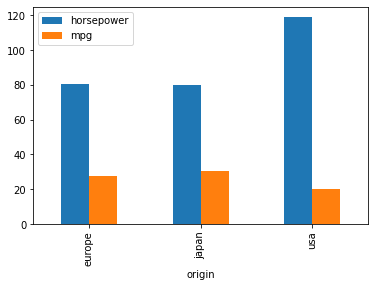

In [84]:
(pd
 .pivot_table(data = df, index = ["origin"], values = ['horsepower', 'mpg'], aggfunc = 'mean' )
 .plot
 .bar(stacked = False))

### Category breakdown

Stacked Barcharts

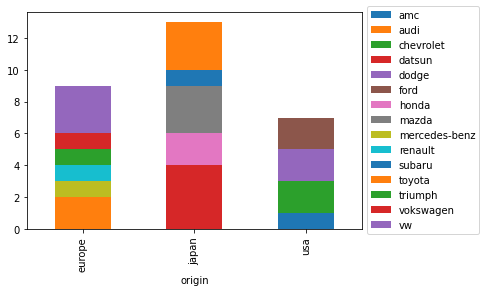

In [85]:
pd.pivot_table(df.query("model_year == 80"), index = ['origin'], columns = 'brand', values = "name", aggfunc = 'nunique').plot.bar(stacked = True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### 2 Axis Chart

In [86]:
df1 = pd.pivot_table(df, index = "origin", values = "name", aggfunc = "nunique")
df1

,name
origin,
europe,58
japan,60
usa,187


In [87]:
df2 = pd.pivot_table(df, index = "origin", values = "mpg", aggfunc = "mean")
df2

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


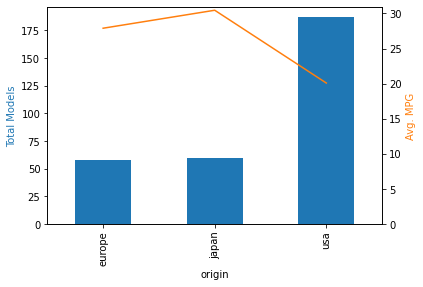

In [88]:
import matplotlib.pyplot as plt
# Create matplotlib figure
fig = plt.figure() 

# Create matplotlib axes
ax = fig.add_subplot() 
ax2 = ax.twinx()

# Plot the data
df1['name'].plot(kind='bar', color='tab:blue', ax=ax)
df2['mpg'].plot(kind='line', color='tab:orange', ax=ax2)

# Styling
ax.set_ylabel('Total Models')
ax2.set_ylabel('Avg. MPG')
ax2.set_ylim(bottom = 0)
ax.yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:orange') 
plt.show()

## Relationships

### Two numerical variables

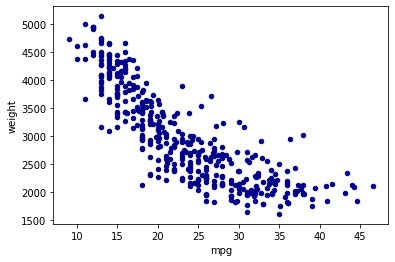

In [89]:
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
df.plot.scatter(x='mpg', y='weight', c='DarkBlue')

### Two Numeric + 1 Categorical Variable

Color Mapping

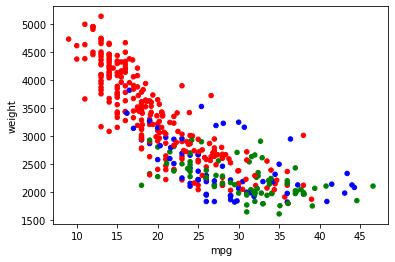

In [90]:
# Custom colors
colors = {'europe':'blue', 'usa':'red', 'japan':'green'}
df.plot.scatter(x='mpg', y='weight', c=df['origin'].map(colors))

Automatic color mapping for lots of categories

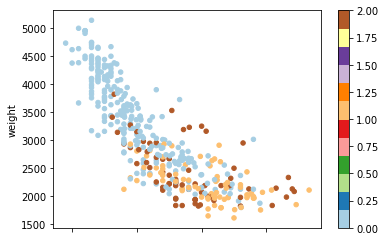

In [91]:
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = pd.factorize(df['origin'])[0]
df.plot.scatter(x='mpg', y='weight', c=colors, colormap = "Paired")

Automatic color mapping with labels

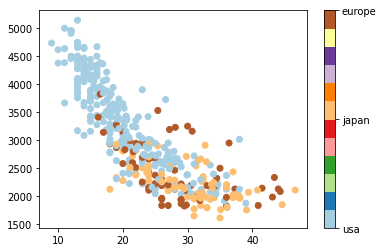

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# specify the categorical column
cat_column_encoded, cat_column_categories = df['origin'].factorize()

# create a scatter plot with a colormap based on the categorical column
plt.scatter(x=df['mpg'], y=df['weight'], c=cat_column_encoded, cmap='Paired')

# add a colorbar to the plot
cb = plt.colorbar()
cb.set_ticks(np.arange(len(cat_column_categories)))
cb.set_ticklabels(cat_column_categories)

# show the plot
plt.show()

# -> easier done in seaborn

### Time series

Line charts

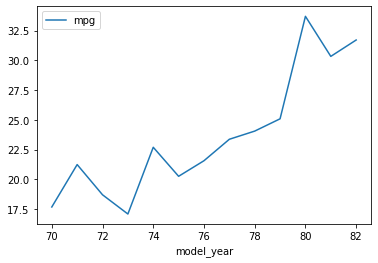

In [93]:
(pd
.pivot_table(df, index = ['model_year'], values = ['mpg'], aggfunc = 'mean')
.plot
.line())

Multi Line Charts

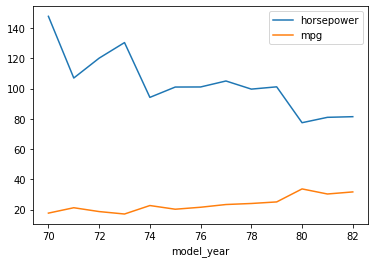

In [94]:
(pd
.pivot_table(df, index = ['model_year'], values = ['mpg', 'horsepower'], aggfunc = 'mean')
.plot
.line())

Multi line charts (2 axes)

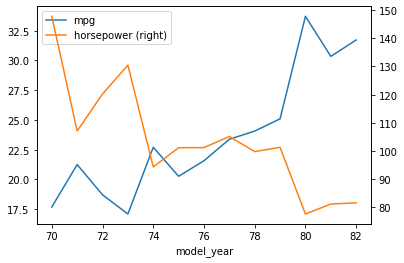

In [95]:
fig, ax = plt.subplots() 
pivot = pd.pivot_table(df, index = ['model_year'], values = ['mpg', 'horsepower'], aggfunc = 'mean').reset_index()
pivot.plot(x = 'model_year', y = 'mpg', ax = ax) 
pivot.plot(x = 'model_year', y = 'horsepower', ax = ax, secondary_y = True) 